# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install jupyter_contrib_nbextensions

  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963415 sha256=df81b4193f50f3ee69b22ae925d8698145ec919dcf05c0c28281621204d205b6
  Stored in directory: c:\users\maica\appdata\local\pip\cache\wheels\f7\b5\78\f5b899dd8fc137fe0bfe26b382713f6d171c9eac2fb1fa091f
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465842 sha256=095976cfacd469c2d891b2a0449022755a63f9fe792d4ef05d604e04697ebf17
  Stored in directory: c:\users\maica\appdata\local\pip\cache\wheels\94\62\cd\233da8580d4e1228ab3fbede758ab1b97174bf9d9cea095049
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat_list = []
lng_list = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


#loop the cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | jalu
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | teya
Processing Record 6 of Set 1 | nanakuli
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | morondava
Processing Record 10 of Set 1 | hamina
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | ouro preto do oeste
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | shihezi
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | lahij
Processing Record 18 of Set 1 | chalus
Processing Record 19 of Set 1 | reforma
Processing Record 20 of Set 1 | bridgetown
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | hasaki
City not found. Skipping...
Processing Record 23 of

Processing Record 35 of Set 4 | qasigiannguit
Processing Record 36 of Set 4 | katsuura
Processing Record 37 of Set 4 | mar del plata
City not found. Skipping...
Processing Record 38 of Set 4 | ginir
Processing Record 39 of Set 4 | zyryanka
Processing Record 40 of Set 4 | bojnurd
Processing Record 41 of Set 4 | kysyl-syr
Processing Record 42 of Set 4 | qujing
Processing Record 43 of Set 4 | shimoda
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | oktyabrskoye
Processing Record 46 of Set 4 | prince rupert
City not found. Skipping...
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | karratha
City not found. Skipping...
Processing Record 49 of Set 4 | mozarlandia
Processing Record 50 of Set 4 | araouane
Processing Record 0 of Set 5 | alvaraes
Processing Record 1 of Set 5 | paamiut
Processing Record 2 of Set 5 | tazovskiy
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | ishurdi
Processing Record 5 of Set 5 | canillo
Proce

Processing Record 20 of Set 8 | wewak
Processing Record 21 of Set 8 | iberia
City not found. Skipping...
Processing Record 22 of Set 8 | nishihara
Processing Record 23 of Set 8 | pravdinsk
Processing Record 24 of Set 8 | pineville
Processing Record 25 of Set 8 | plettenberg bay
Processing Record 26 of Set 8 | sabang
Processing Record 27 of Set 8 | leh
Processing Record 28 of Set 8 | ilebo
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 8 | encheng
Processing Record 30 of Set 8 | zhigansk
Processing Record 31 of Set 8 | paracatu
Processing Record 32 of Set 8 | hiji
Processing Record 33 of Set 8 | abu samrah
Processing Record 34 of Set 8 | taybad
Processing Record 35 of Set 8 | norman wells
Processing Record 36 of Set 8 | palmer
Processing Record 37 of Set 8 | mehamn
Processing Record 38 of Set 8 | flinders
Processing Record 39 of Set 8 | aksu
Processing Record 40 of Set 8 | marystown
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set

City not found. Skipping...
Processing Record 5 of Set 12 | quatre cocos
Processing Record 6 of Set 12 | harindanga
Processing Record 7 of Set 12 | kasongo-lunda
Processing Record 8 of Set 12 | brae
Processing Record 9 of Set 12 | karatau
Processing Record 10 of Set 12 | mekhe
Processing Record 11 of Set 12 | fortuna foothills
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_data = pd.DataFrame({"City":city_list, "Lat": lat_list, "Lng": lng_list, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness,
                    "Wind Speed": wind_speed, "Country": country, "Date": date })
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,82.11,75,100,8.12,PG,1648022672
1,Ushuaia,-54.8000,-68.3000,37.06,98,90,5.08,AR,1648022585
2,Jalu,29.0331,21.5482,53.78,42,0,12.50,LY,1648022673
3,Ribeira Grande,38.5167,-28.7000,61.20,63,75,6.91,PT,1648022674
4,Teya,60.3778,92.6267,26.29,71,100,7.61,RU,1648022675


In [12]:
city_data.to_csv("cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
city_data["Humidity"] >100

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Name: Humidity, Length: 572, dtype: bool

In [16]:
city_data.loc[city_data['Humidity']>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [17]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data['Date']

0     1970-01-01 00:00:01.648022672
1     1970-01-01 00:00:01.648022585
2     1970-01-01 00:00:01.648022673
3     1970-01-01 00:00:01.648022674
4     1970-01-01 00:00:01.648022675
                   ...             
567   1970-01-01 00:00:01.648023099
568   1970-01-01 00:00:01.648023099
569   1970-01-01 00:00:01.648023100
570   1970-01-01 00:00:01.648023101
571   1970-01-01 00:00:01.648023102
Name: Date, Length: 572, dtype: datetime64[ns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

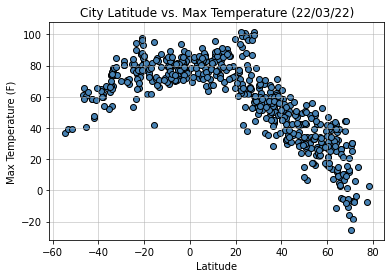

In [18]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], facecolor="steelblue", edgecolor = "black" )
plt.title("City Latitude vs. Max Temperature (22/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

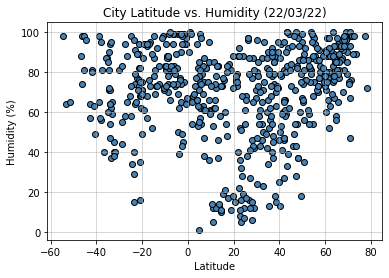

In [19]:
plt.scatter(city_data["Lat"], city_data["Humidity"], facecolor="steelblue", edgecolor = "black" )
plt.title("City Latitude vs. Humidity (22/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

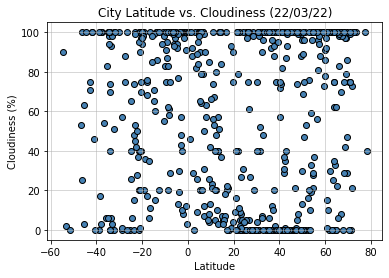

In [20]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (22/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

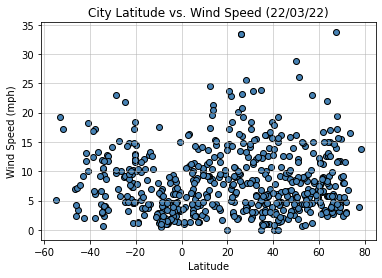

In [21]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (22/03/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs Wind Speed.png")

## Linear Regression

In [30]:
north_hemisphere = city_data.loc[city_data["Lat"] >= 0]
south_hemisphere = city_data.loc[city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5194829385973639


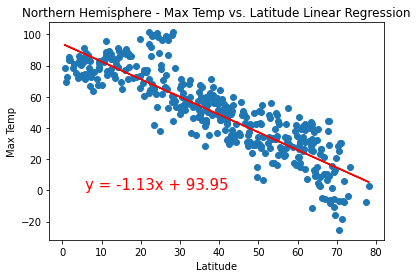

In [33]:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, pvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5791342376888299


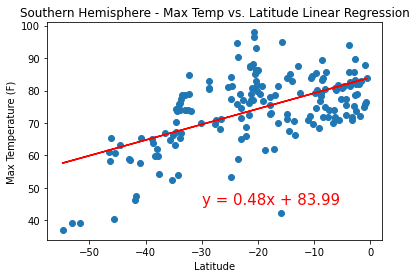

In [59]:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig("Southern - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.35621300136512124


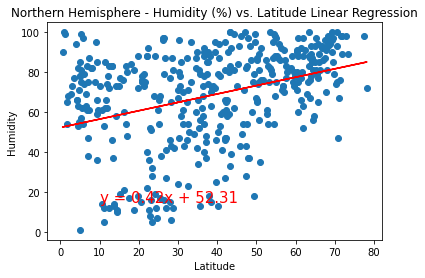

In [58]:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig("Northern-Humidity vs. Latitude Linear Regression.png")
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17873865881982284


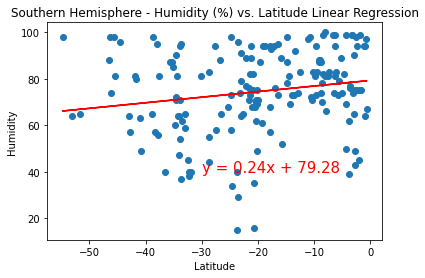

In [57]:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig("Southern -Humidity vs. Latitude Linear Regression.png")
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1636325421217674


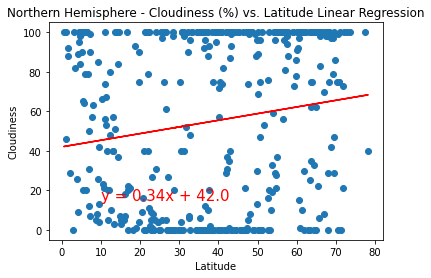

In [56]:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig("Northern - Cloudiness vs. Latitude Linear Regression.png")
plt.show() 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24724038134204507


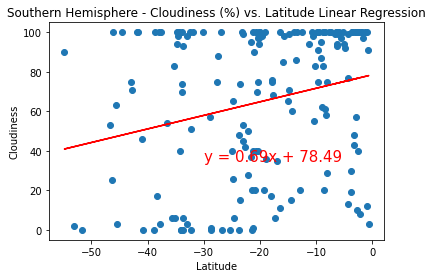

In [55]:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig("Southern - Cloudiness vs. Latitude Linear Regression.png")
plt.show() 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.028235545931432484


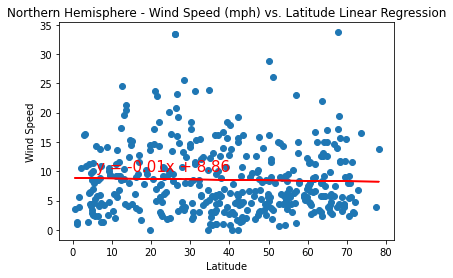

In [54]:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig("Northern - Wind Speed vs. Latitude Linear Regression.png")
plt.show() 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.35261463758164835


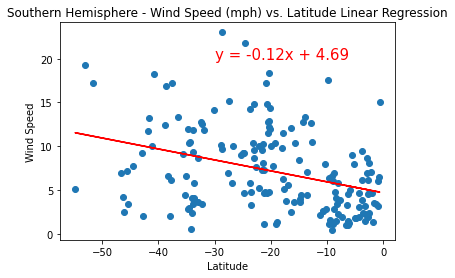

In [62]:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig("Southern - Wind Speed vs. Latitude Linear Regression.png")
plt.show() 

# Analysis
nCLnL


# 